In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import pynbody

mpl.rc('font',**{'family':'serif','monospace':['Palatino']})
mpl.rc('text', usetex=True)
plt.rcParams['figure.constrained_layout.use'] = False
mpl.rcParams.update({'font.size': 9})

In [19]:
# it is convenient to define these functions to read in our datasets for us

def read_z0(simname):
    '''Function to read in the data file which contains z=0 information for the various halos.'''
    data = []
    with open('../../Data/z0_data/'+ simname + '.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data1 = pd.DataFrame(data)
    return data1
    
def read_timesteps(simname):
    '''Function to read in the timestep bulk-processing datafile (from /home/akinhol/Data/Timescales/DataFiles/{name}.data)'''
    data = []
    with open(f'../../Data/timesteps_data/{simname}.data','rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
    
    data = pd.DataFrame(data)
    return data

def read_infall_properties():
    '''Function to read in the data file with quenching timescales and satellite properties at infall.'''
    data = []
    with open(f'../../Data/QuenchingTimescales_InfallProperties.data','rb') as f:
        while True:
            try: 
                data.append(pickle.load(f))
            except EOFError:
                break
            
    data = pd.DataFrame(data)
    data['timescale'] = data.tinfall - data.tquench
    
    return data

In [20]:
names = ['h148','h242','h229','h329']
age = 13.800797497330507
rquench = np.array([])
tquench = np.array([])
tinfall = np.array([])
sims = np.array([])
hids = np.array([])

q_thresh = 1e-11
i_thresh = 1
for name in names:
    print(f'Simulation {name}')

    z0_all = read_z0(name) # the datasets for the simulation as a whole
    timesteps_all = read_timesteps(name)

    haloids = np.unique(np.array(timesteps_all.z0haloid, dtype=int)) # all the unique haloids we're interested in

    for haloid in haloids: # for each satellite
        z0 = z0_all[z0_all.haloid==haloid] # the datasets with *just this specific satellite*, a subset of the datasets previously defined
        timesteps = timesteps_all[np.array(timesteps_all.z0haloid,dtype=int)==haloid]

        # get the quenching time
        sfr = np.array(timesteps.sfr,dtype=float)
        mstar = np.array(timesteps.mstar,dtype=float)
        dist = np.array(timesteps.h1dist,dtype=float)
        time = np.array(timesteps.time,dtype=float)

        sfr = sfr[np.argsort(time)]
        mstar = mstar[np.argsort(time)]
        dist = dist[np.argsort(time)]
        time = np.sort(time)

        sSFR = sfr/mstar
        lbt = 13.8007 - time

        is_quenched = z0.sSFR.tolist()[0] < q_thresh # boolean expression to determine whether the satellite is quenched
        # is its z=0 sSFR below the threshold? 

        if is_quenched:
            # then the halo is quenched, so we calculate the quenching time
            for i in range(0,len(lbt)):
                t = np.flip(lbt)[i]
                s = np.flip(sSFR)[i]
                r = np.flip(dist)[i]
                if s > 1e-11:
                    #print(f'\t Halo {haloid}, quenched {t:.2f} Gyr ago at radius {r:.2f} kpc')
                    rq = r
                    tq = t
                    break
                else:
                    continue      
        else:
            #print(f'\t Halo {haloid}, unquenched at z = 0')
            tq, rq = None, None
            
        dist = np.array(timesteps.h1dist,dtype=float)
        time = age - np.array(timesteps.time, dtype=float) # in Gyr ago

        try:
            ti = np.max(time[dist <= i_thresh]) 
            #print(f'\t Halo {haloid}, infall {ti} Gyr ago')
        except ValueError:
            #print(f'\t Halo {haloid}, never infell')
            ti = None

        rquench = np.append(rquench,rq)
        tquench = np.append(tquench,tq)
        tinfall = np.append(tinfall,ti)
        sims = np.append(sims,name)
        hids = np.append(hids,haloid)


Simulation h148


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipy

Simulation h242


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipy

Simulation h229


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipy

Simulation h329


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipy

In [21]:
condition = (rquench != None) & (tquench != None) 
rq2 = rquench[condition]
ti2 = tinfall[condition]
tq2 = tquench[condition]
sims2 = sims[condition]
hids2 = hids[condition]

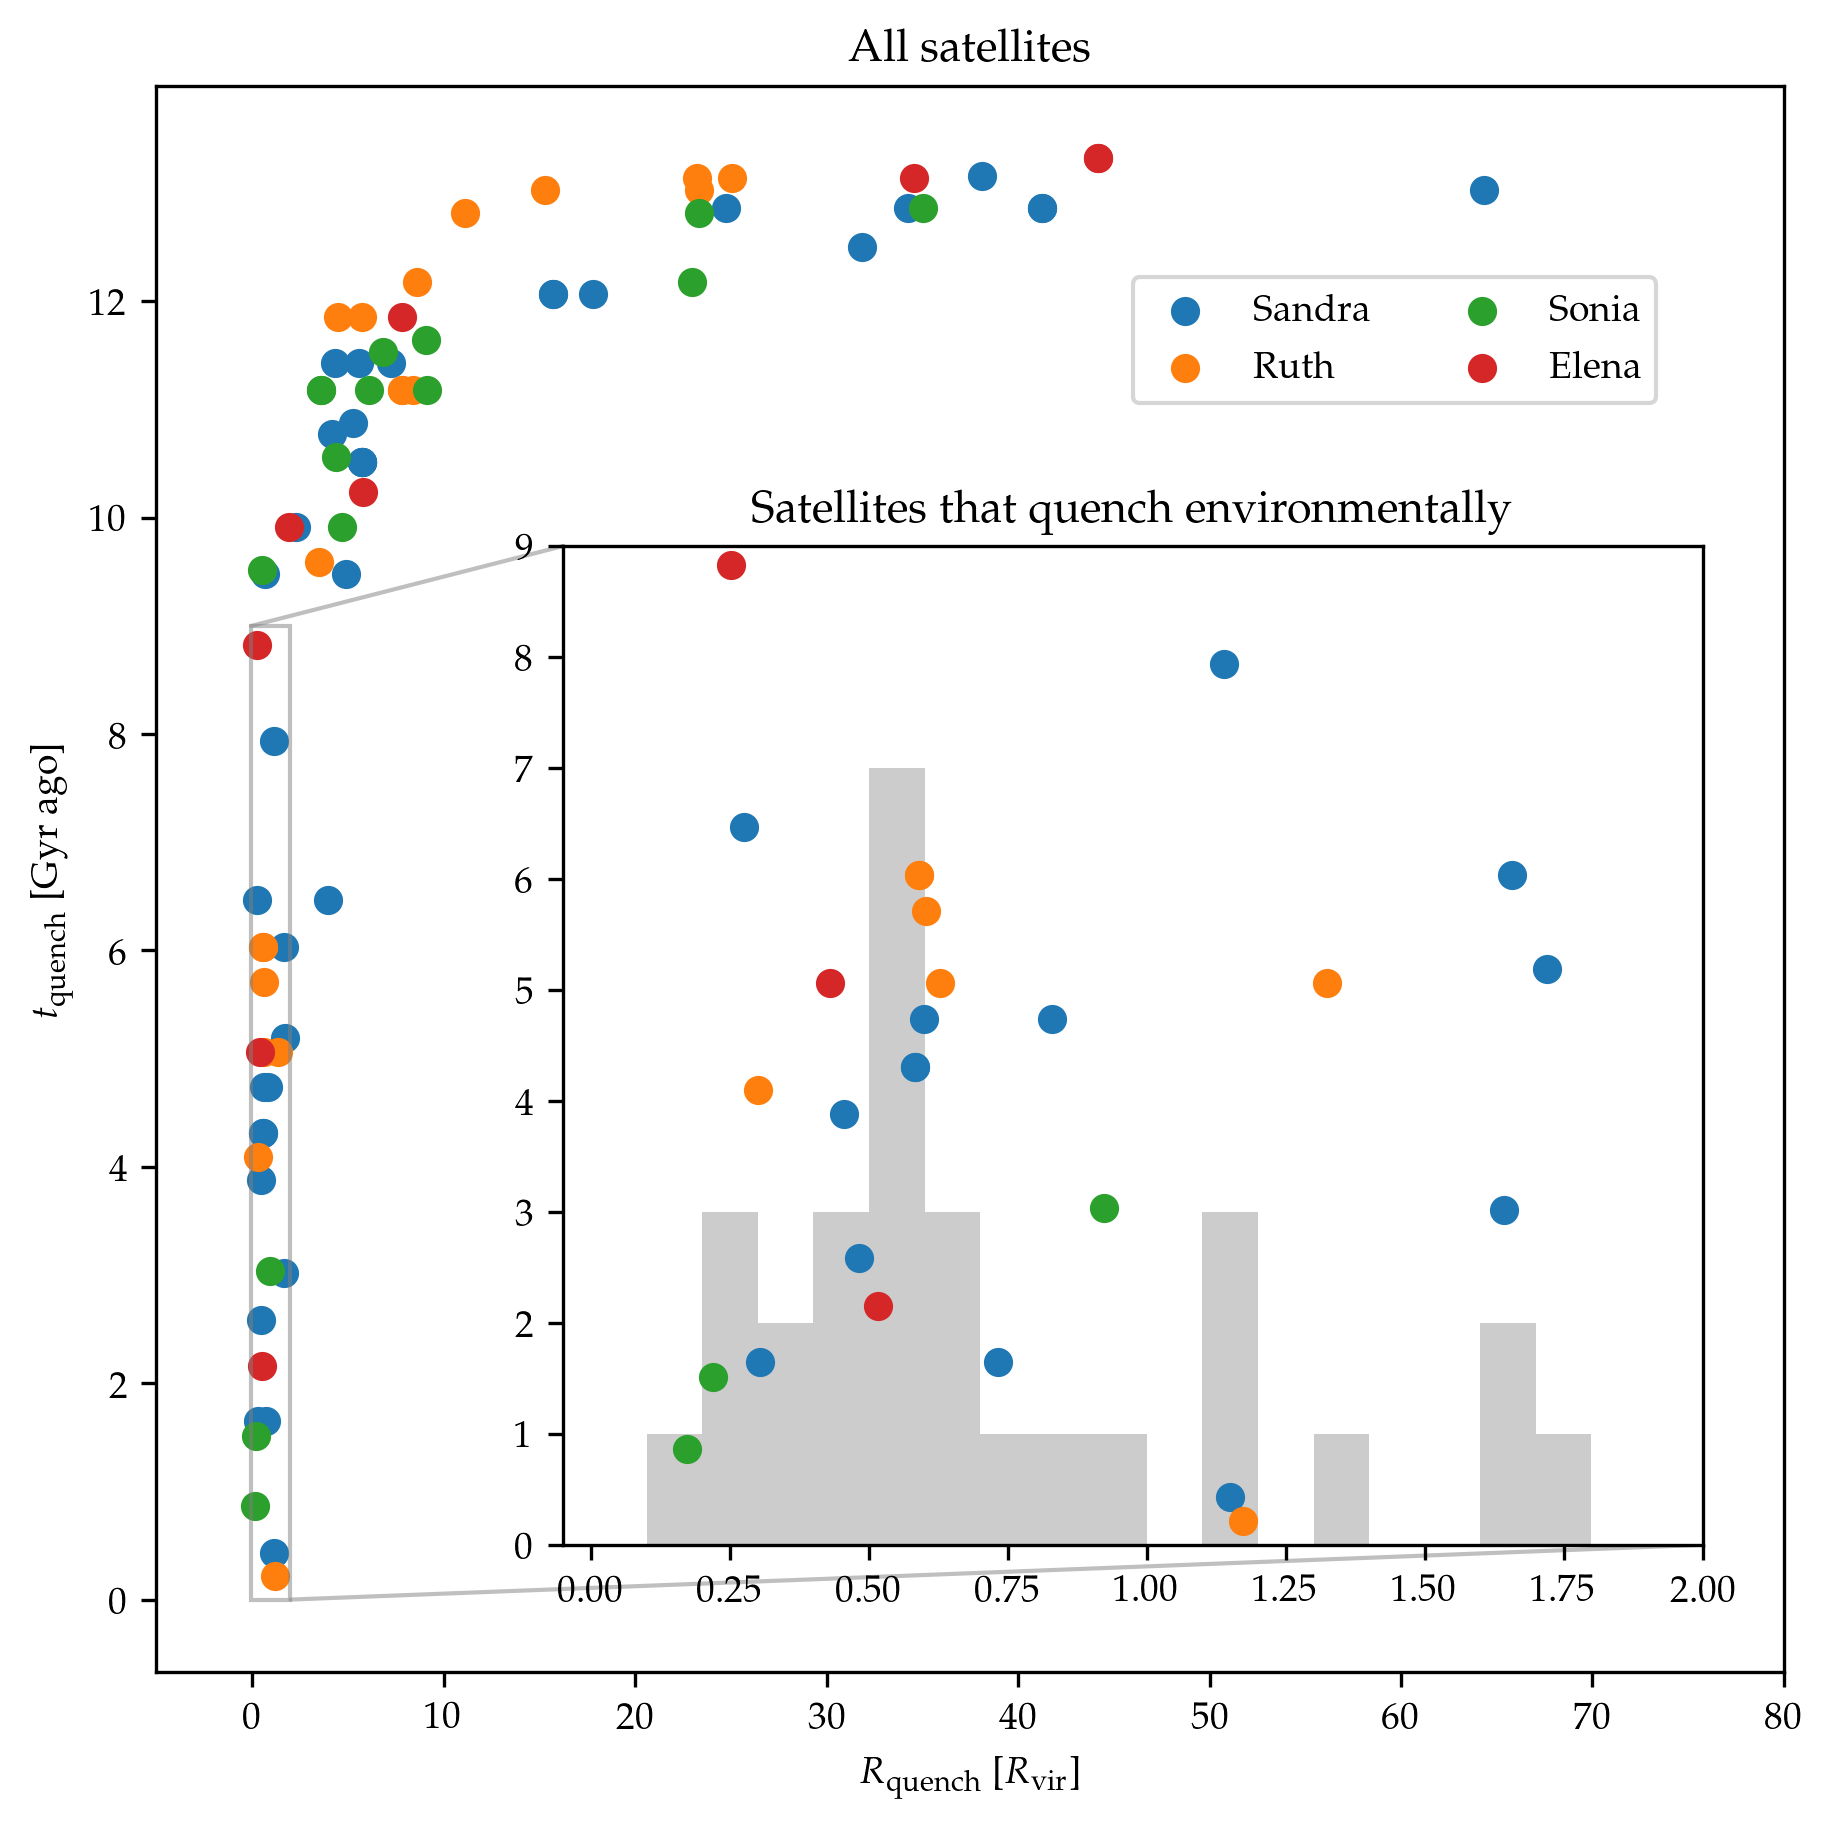

In [22]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=300)
ax.scatter(rq2[sims2=='h148'],tq2[sims2=='h148'], label='Sandra')
ax.scatter(rq2[sims2=='h229'],tq2[sims2=='h229'], label='Ruth')
ax.scatter(rq2[sims2=='h242'],tq2[sims2=='h242'], label='Sonia')
ax.scatter(rq2[sims2=='h329'],tq2[sims2=='h329'], label='Elena')
ax.set_xlabel(r'$R_{\rm quench}$ [$R_{\rm vir}$]')
ax.set_ylabel(r'$t_{\rm quench}$ [Gyr ago]')
ax.legend(ncol=2, loc=(0.6,0.8))
ax.set_xlim(-5,80)

ax2 = ax.inset_axes([0.25,0.08,0.7,0.63])

ax2.scatter(rq2[sims2=='h148'],tq2[sims2=='h148'], label='Sandra')
ax2.scatter(rq2[sims2=='h229'],tq2[sims2=='h229'], label='Ruth')
ax2.scatter(rq2[sims2=='h242'],tq2[sims2=='h242'], label='Sonia')
ax2.scatter(rq2[sims2=='h329'],tq2[sims2=='h329'], label='Elena')
ax2.set_xlim(-0.05,2)
ax2.set_ylim(0,9)
ax2.hist(rq2, bins=np.arange(0,2,0.1), zorder=-1, color='k', alpha=0.2)

ax2.set_title('Satellites that quench environmentally')
ax.set_title('All satellites')
ax.indicate_inset_zoom(ax2)

# plt.savefig('r_quench.png',dpi=300)
plt.show()


0.5946398834069082


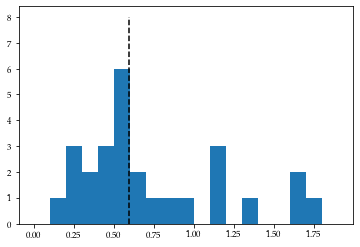

In [23]:
plt.hist(rq2[tq2 < 9], bins=np.arange(0,2,0.1))
m = np.median(rq2[tq2 < 9])
plt.plot([m,m],[0,8],'k--')
print(m)

In [24]:
print(sims2[(rq2 > 3)&(rq2 < 5)])
print(hids2[(rq2 > 3)&(rq2 < 5)])

['h148' 'h148' 'h148' 'h148' 'h242' 'h242' 'h242' 'h242' 'h229' 'h229']
[ 30. 128. 384. 386.  30.  34.  40.  78.  53. 113.]


[4.666439108378722]
[1.5084313316065892]
[9.912451252402938]
1.08e+06


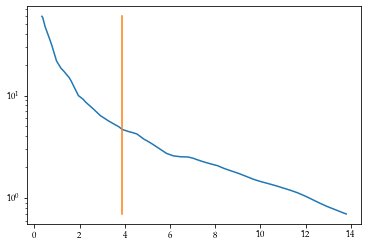

In [26]:
sim,i = 'h242',40

data = read_timesteps(sim)
data = data[data.z0haloid==i]

print(rquench[(sims==sim)&(hids==i)])
print(tinfall[(sims==sim)&(hids==i)])
print(tquench[(sims==sim)&(hids==i)])
print(f'{data.mstar.tolist()[np.argmin(data.z)]:.2e}')

plt.plot(data.time, data.h1dist)
plt.plot([age-tquench[(sims==sim)&(hids==i)][0]]*2,[np.min(data.h1dist), np.max(data.h1dist)])
plt.semilogy()
plt.show()

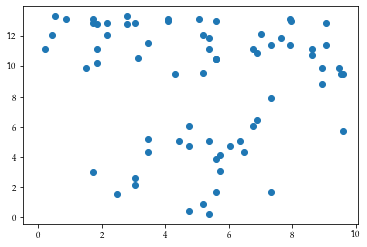

In [27]:
plt.scatter(tinfall,tquench)

In [28]:
def read_timescales():
    '''Function to read in the resulting data file which contains quenching and infall times'''
    data = []
    with open('../../Data/QuenchingTimescales.data', 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f,encoding='latin1'))
            except EOFError:
                break

    data = pd.DataFrame(data)
    return data

In [29]:
data = read_timescales()
rquench = rquench[(~np.isnan(np.array(data.tinfall,dtype=float)))&(data.n_star > 50)]

(array([12.,  5.,  1.,  1.,  2.,  2.,  3.,  0.,  0.,  1.]),
 array([0.22012051965366294, 1.110922287407431, 2.001724055161199,
        2.8925258229149673, 3.783327590668735, 4.674129358422503,
        5.564931126176272, 6.45573289393004, 7.346534661683807,
        8.237336429437576, 9.128138197191344], dtype=object),
 <BarContainer object of 10 artists>)

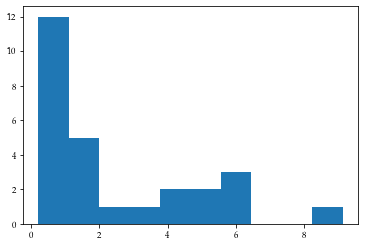

In [37]:
data = read_infall_properties()
data['rquench'] = rquench
q = data[(data.tquench < 9.5)&(data.timescale > -2)] 
quenched = np.array(data.quenched,dtype=bool)
sf = data[~quenched]
data = q.append(sf)
quenched = np.array(data.quenched,dtype=bool)
tinfall = np.array(data.tinfall)
timescale = np.array(data.timescale)
timescale[~quenched] = tinfall[~quenched]



plt.hist(np.array(data.rquench)[np.array(data.rquench) != None])

In [39]:
import pandas as pd

data = pd.read_hdf('../../Data/density_profiles.hdf5')
data.head()

,rbins,density,rvir,t
0,0.027701,1.913413e+09,1.775104,0.248485
1,0.063103,1.034691e+09,1.775104,0.248485
2,0.098505,4.599648e+08,1.775104,0.248485
3,0.133907,2.642415e+08,1.775104,0.248485
4,0.169309,2.174275e+08,1.775104,0.248485


/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


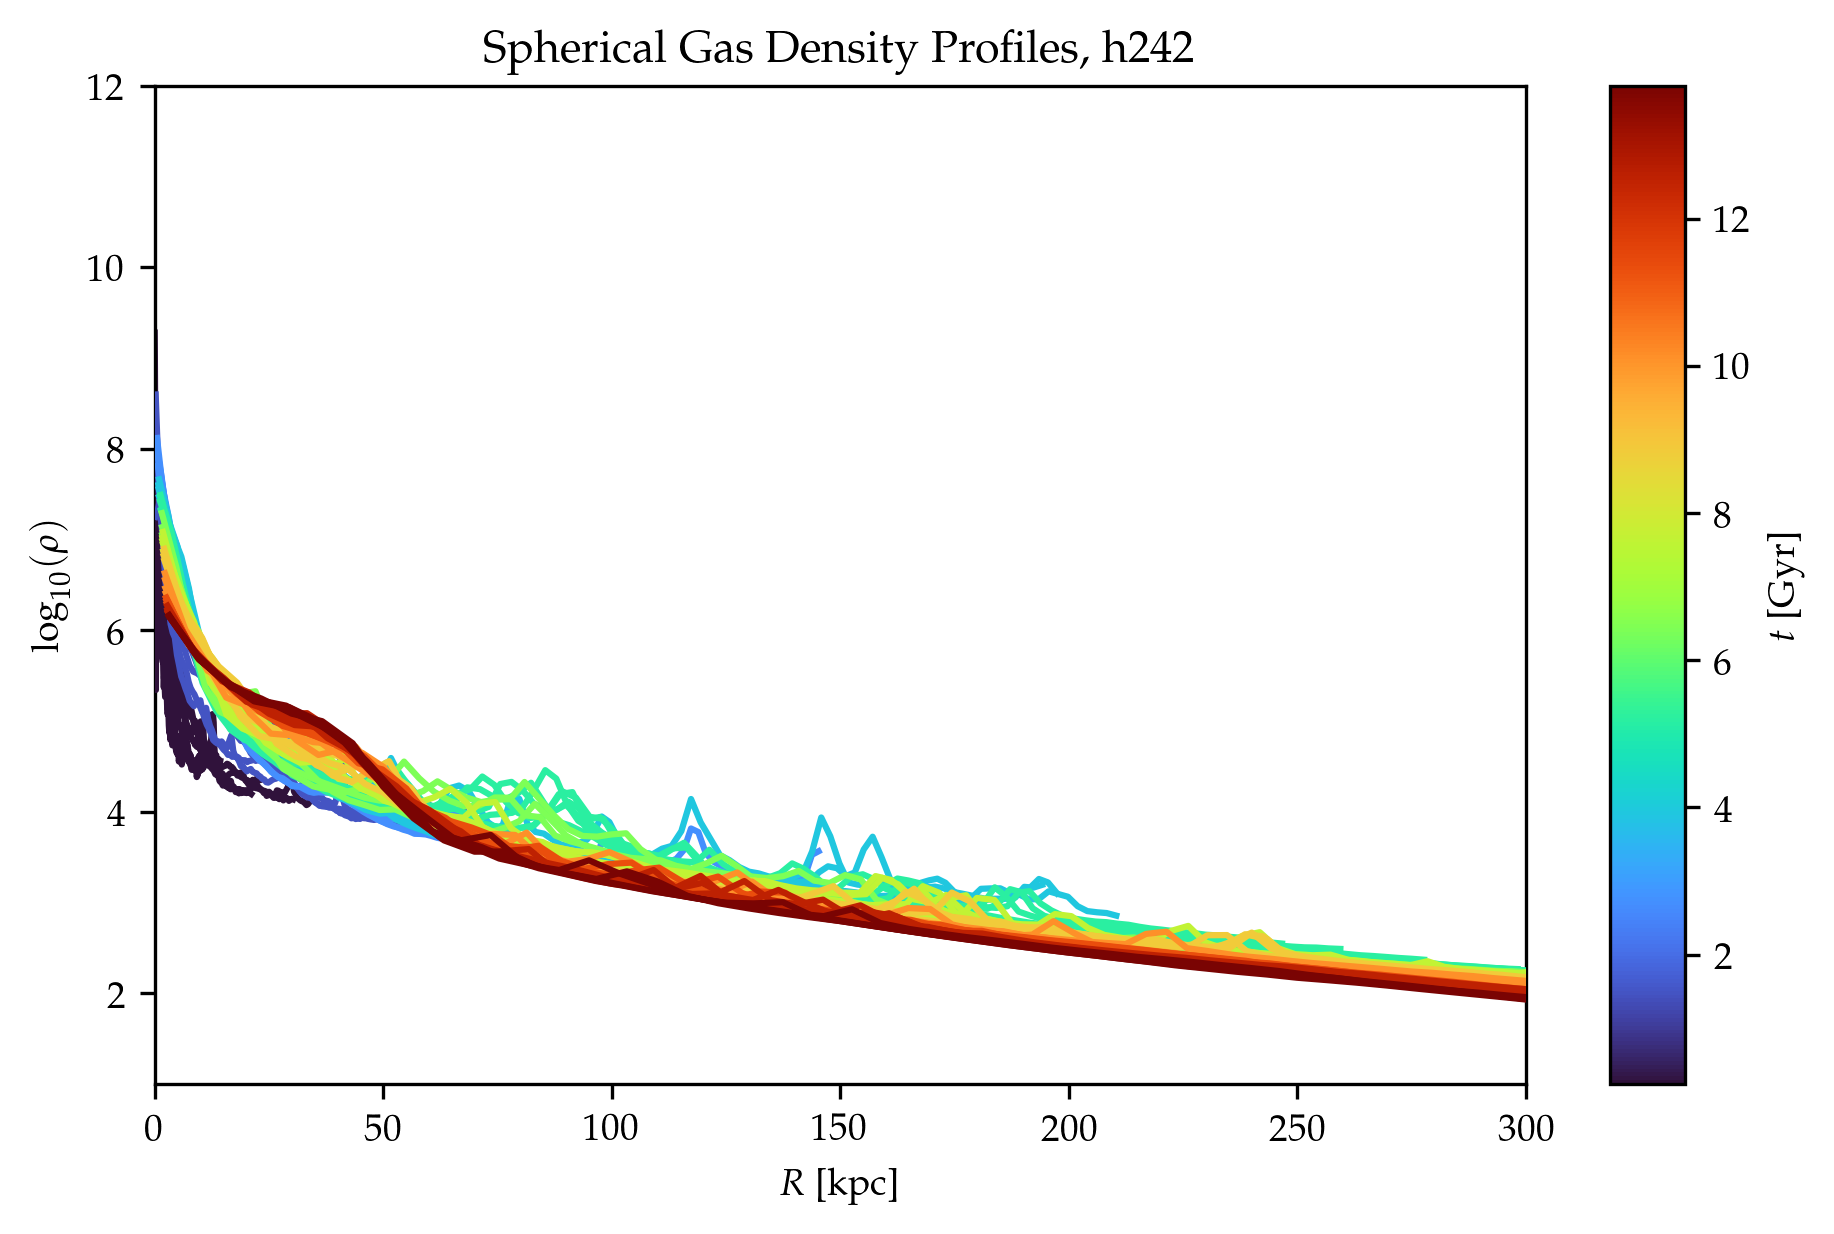

In [44]:
fig, ax = plt.subplots(1,1,dpi=300, constrained_layout=True)

cmap_name = 'turbo'
cmap = mpl.cm.get_cmap(cmap_name, 12)
vmin, vmax = np.min(data.t), np.max(data.t)

rho_CGM_1 = []
rho_CGM_05 = []
rho_CGM_075 = []

for i,t in enumerate(np.unique(data.t)):
    d = data[data.t == t]
    rbins = np.array(d.rbins)
    density = np.array(d.density)
    rvir = np.array(d.rvir)
    
    color = cmap((t-vmin)/(vmax-vmin))

    ax.plot(rbins, np.log10(density), zorder=i, color=color)
    rho_CGM_1.append(density[np.argmin(np.abs(np.array(rbins/rvir)-1))])
    rho_CGM_05.append(density[np.argmin(np.abs(np.array(rbins/rvir)-0.5))])
    rho_CGM_075.append(density[np.argmin(np.abs(np.array(rbins/rvir)-0.75))])


fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cmap_name), ax=ax, label='$t$ [Gyr]')



ax.set_xlim(0, 300)
ax.set_ylim(1, 12)

ax.set_xlabel(r'$R$ [kpc]')
ax.set_ylabel(r'$\log_{10} (\rho)$')

ax.set_title('Spherical Gas Density Profiles, h242')

plt.savefig('density_profiles_kpc.pdf')
plt.show()

/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/hollis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


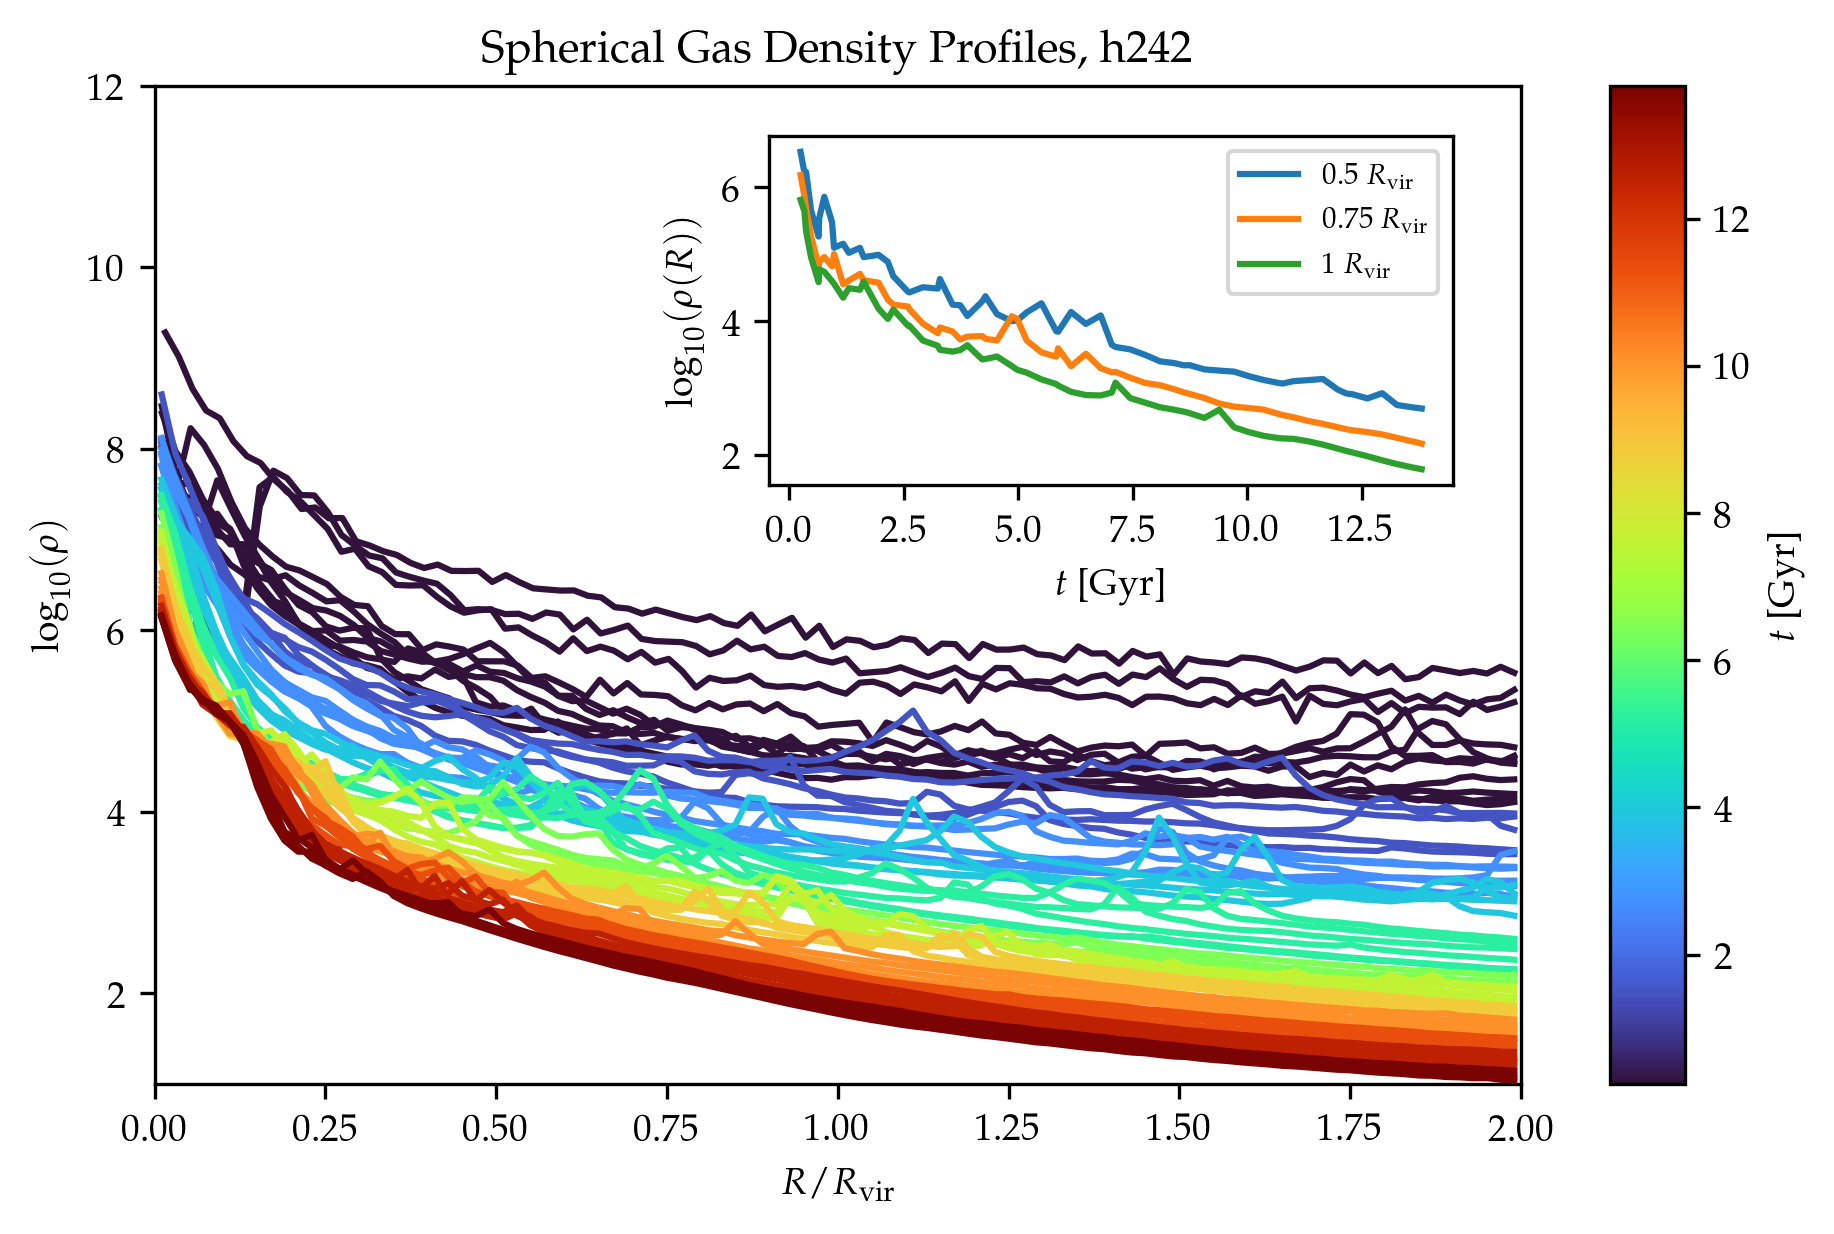

In [45]:
fig, ax = plt.subplots(1,1,dpi=300, constrained_layout=True)

cmap_name = 'turbo'
cmap = mpl.cm.get_cmap(cmap_name, 12)
vmin, vmax = np.min(data.t), np.max(data.t)

rho_CGM_1 = []
rho_CGM_05 = []
rho_CGM_075 = []

for i,t in enumerate(np.unique(data.t)):
    d = data[data.t == t]
    rbins = np.array(d.rbins)
    density = np.array(d.density)
    rvir = np.array(d.rvir)
    #print(np.mean(rvir))
    
    color = cmap((t-vmin)/(vmax-vmin))

    ax.plot(rbins/rvir, np.log10(density), zorder=i, color=color)
    rho_CGM_1.append(density[np.argmin(np.abs(np.array(rbins/rvir)-1))])
    rho_CGM_05.append(density[np.argmin(np.abs(np.array(rbins/rvir)-0.5))])
    rho_CGM_075.append(density[np.argmin(np.abs(np.array(rbins/rvir)-0.75))])


fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax), cmap=cmap_name), ax=ax, label='$t$ [Gyr]')



ax.set_xlim(0, 2)
ax.set_ylim(1, 12)

ax.set_xlabel(r'$R/R_{\rm vir}$')
ax.set_ylabel(r'$\log_{10} (\rho)$')

ax1 = ax.inset_axes([0.45, 0.6, 0.5, 0.35])
ax1.set_xlabel('$t$ [Gyr]')
ax1.set_ylabel(r'$\log_{10} (\rho(R))$')

ax1.plot(np.unique(data.t), np.log10(rho_CGM_05), label=r'$0.5~R_{\rm vir}$')
ax1.plot(np.unique(data.t), np.log10(rho_CGM_075), label=r'$0.75~R_{\rm vir}$')
ax1.plot(np.unique(data.t), np.log10(rho_CGM_1), label=r'$1~R_{\rm vir}$')
ax1.legend(fontsize=7)


ax.set_title('Spherical Gas Density Profiles, h242')
plt.savefig('density_profiles_Rvir.pdf')
plt.show()

In [22]:
np.unique(data.t)

array([ 0.24848475,  0.33266061,  0.36969799,  0.47744308,  0.64242776,
        0.65589589,  0.76700802,  0.93535973,  0.97913118,  1.1777862 ,
        1.30236646,  1.54479293,  1.62560175,  1.94883704,  2.15422612,
        2.27207232,  2.59530761,  2.62224388,  2.91854289,  3.24177818,
        3.28891666,  3.56501346,  3.73336517,  3.88824875,  4.21148403,
        4.28219175,  4.53471932,  4.8579546 ,  4.9758008 ,  5.18118989,
        5.50442517,  5.82766046,  5.86806487,  6.15089574,  6.47413103,
        6.79736632,  7.03979278,  7.1206016 ,  7.44383689,  7.76707217,
        8.09030746,  8.41354274,  8.60883073,  8.73677803,  9.06001331,
        9.3832486 ,  9.70648388, 10.02971917, 10.35295445, 10.67618974,
       10.76709966, 10.99942502, 11.32266031, 11.6458956 , 11.96913088,
       12.15095073, 12.29236617, 12.61560145, 12.93883674, 13.26207202,
       13.58530731, 13.8007975 ])

In [13]:
rvir

array([333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29187985,
       333.29187985, 333.29187985, 333.29187985, 333.29

In [78]:
data = read_infall_properties()
q = data[(data.tquench < 9.5)&(data.timescale > -2)] # select only satellites that quench *environmentally*
# this may not be what we want to do in the end, but it certainly is helpful as I make the plots to reduce the *noise* i'm seeing
quenched = np.array(data.quenched,dtype=bool)
sf = data[~quenched]
data = q.append(sf)

sims = np.array(data.sim, dtype=str)
haloids = np.array(data.haloid, dtype=int)

quenched = np.array(data.quenched,dtype=bool)
mstar = np.array(data.z0_M_star,dtype=float)
tinfall = np.array(data.tinfall)
timescale = np.array(data.timescale)
timescale[~quenched] = tinfall[~quenched]

M_HI_at_infall = np.array(data.M_HI_at_infall, dtype=float)
M_halo_at_infall = np.array(data.M_halo_at_infall, dtype=float)
M_gas_at_infall = np.array(data.M_gas_at_infall, dtype=float)
v_rel = np.array(data.v_rel)#/np.array(data.v_max)
z0_M_star = np.array(data.z0_M_star)
gas_frac = M_gas_at_infall/M_halo_at_infall

age = 13.800797497330507
tinfall_fwd = age - tinfall

Pram_max = np.array([])
for sim, haloid, ti in zip(sims, haloids, tinfall_fwd):
    timesteps = read_timesteps(sim)
    timesteps = timesteps[timesteps.z0haloid==haloid]
    timesteps = timesteps[(timesteps.t > ti)&(timesteps.t < ti+6)]
    Pram = timesteps.Pram
    print(f'{sim}-{haloid}, {np.max(Pram):.2e}')
    Pram_max = np.append(Pram_max, np.max(Pram))
    
    
Pram = np.array(data.Pram)



h329-33, 2.58e+08
h329-137, 5.61e+09
h148-13, 3.53e+08
h148-28, 4.99e+08
h148-36, 2.54e+08
h148-37, 4.51e+08
h148-45, 3.09e+08
h148-61, 3.27e+08
h148-68, 8.49e+08
h148-80, 4.83e+08
h148-96, 1.20e+09
h148-127, 3.95e+10
h148-278, 2.03e+09
h148-283, 7.10e+08
h148-329, 1.33e+09
h242-24, 2.56e+07
h242-41, 3.57e+08
h242-80, 2.52e+09
h229-20, 6.80e+07
h229-22, 3.10e+09
h229-23, 6.77e+07
h229-27, 1.03e+08
h229-55, 2.30e+08
h229-73, 1.17e+09
h329-11, 1.57e+08
h148-2, 8.22e+07
h148-3, 1.07e+08
h148-5, 7.20e+07
h148-6, 1.15e+08
h148-9, 3.32e+08
h148-10, nan
h148-11, 2.20e+08
h148-14, 2.15e+07
h148-21, 1.54e+07
h148-27, 6.33e+08
h148-32, 2.42e+07
h242-10, 4.01e+08
h242-12, 3.94e+09


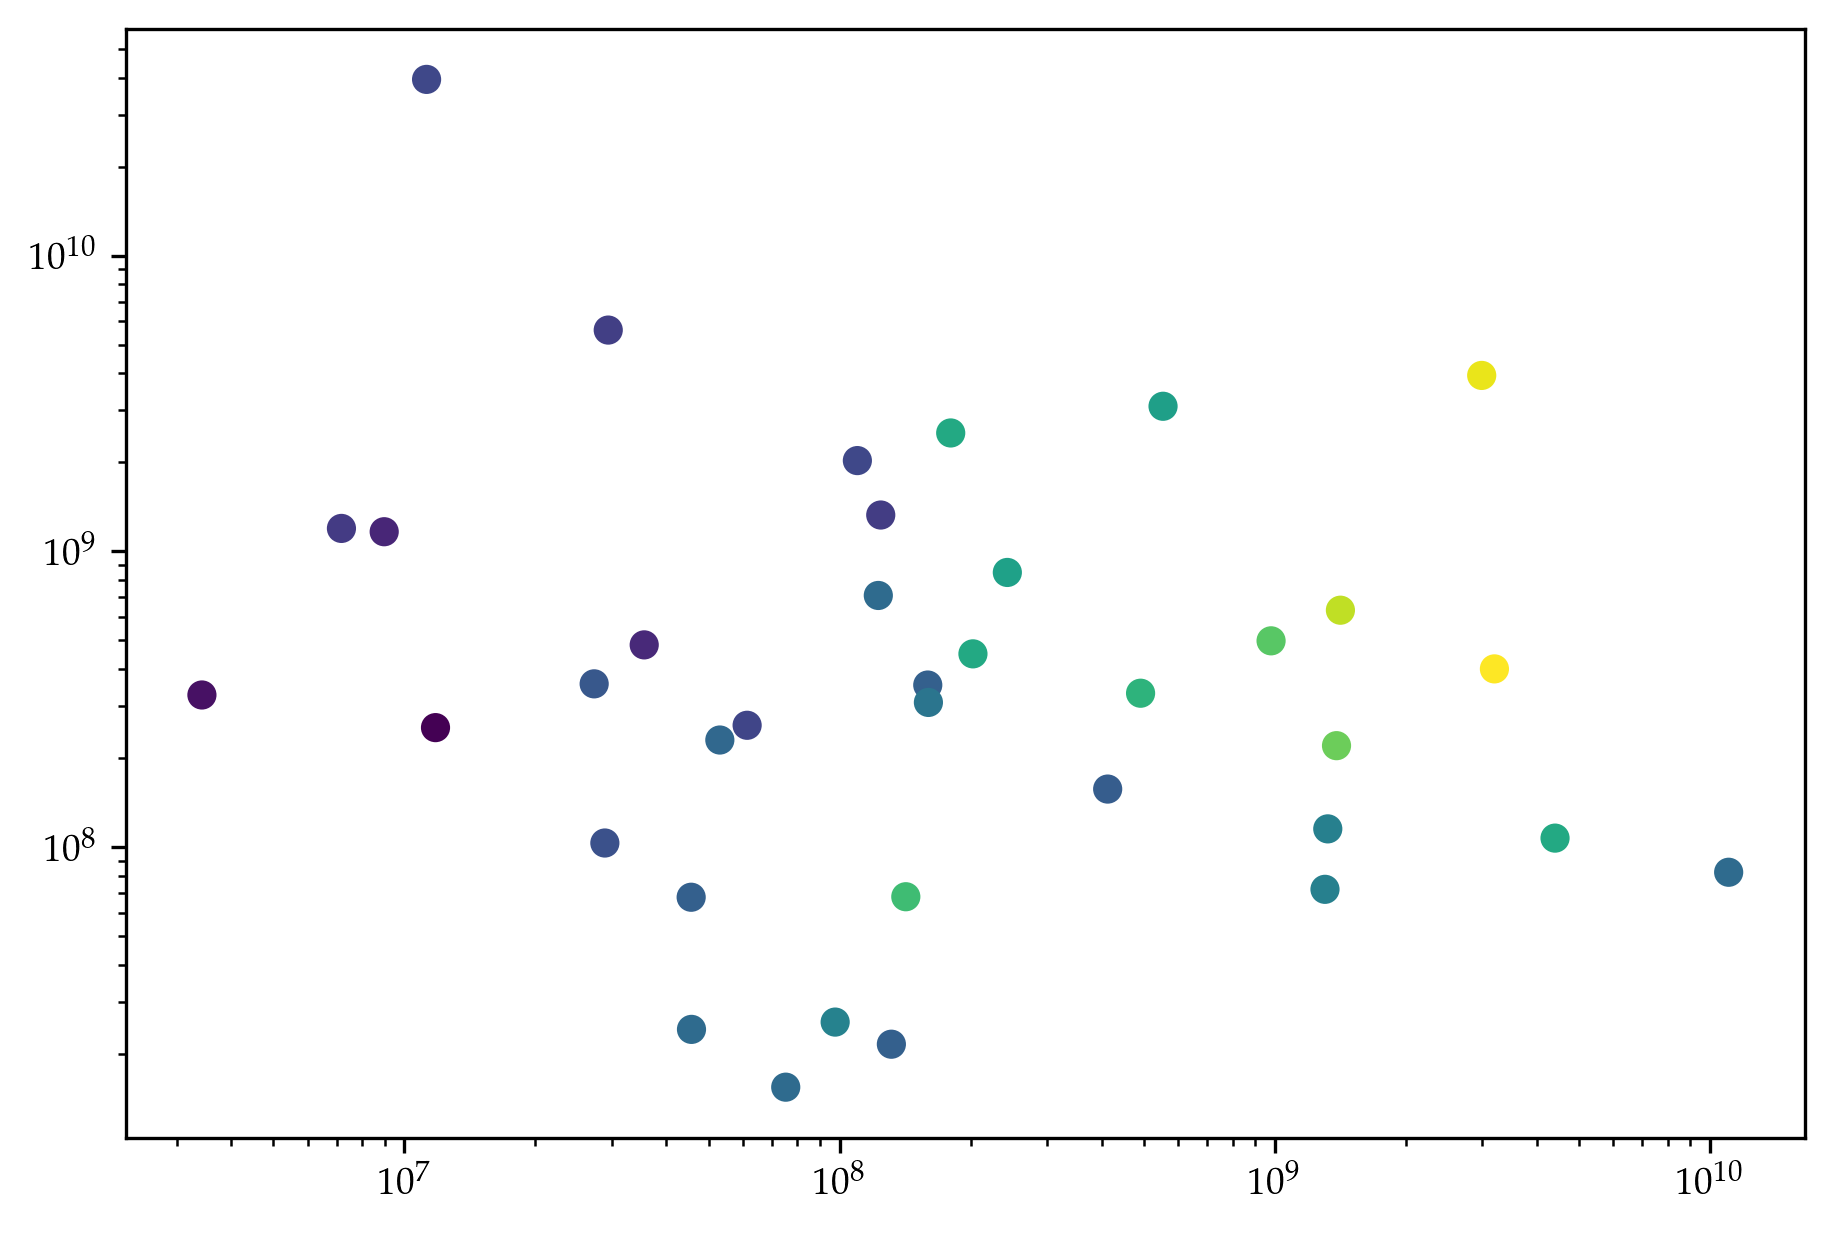

In [56]:
fig, ax = plt.subplots(1,1,dpi=300, constrained_layout=True)

plt.scatter(M_gas_at_infall, Pram_max, c=timescale)
plt.loglog()

plt.show()

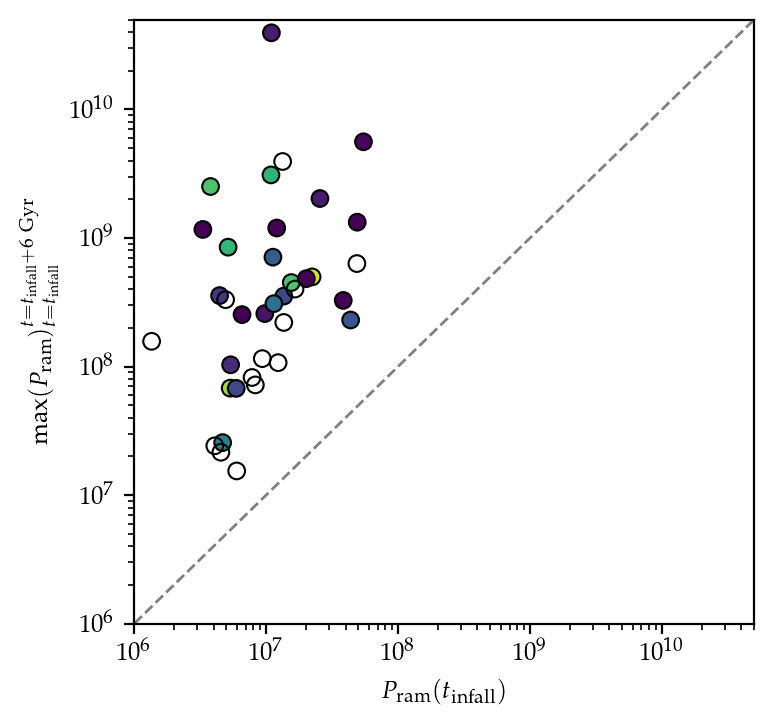

In [91]:
fig, ax = plt.subplots(1,1,dpi=200, figsize=(4,4))

ax.scatter(Pram[quenched], Pram_max[quenched], fc = 'k',  ec='k', lw=0.75, zorder=2, label='Quenched', c=timescale[quenched], vmin=0, vmax=6)
ax.scatter(Pram[~quenched], Pram_max[~quenched], fc = 'none',  ec='k', lw=0.75, zorder=2, label='SF')
ax.set_xlabel(r'$P_{\rm ram}(t_{\rm infall})$')
ax.set_ylabel(r'${\rm max}(P_{\rm ram})_{t=t_{\rm infall}}^{t= t_{\rm infall}+6~{\rm Gyr}}$')
ax.loglog()
ax.set_xlim(1e6, 5e10)
ax.set_ylim(1e6, 5e10)
ax.plot([1e5,1e12],[1e5,1e12], '--', color='0.5', linewidth=1, zorder=-1)

plt.show()


In [65]:
min(Pram_max)

15421783.626432091

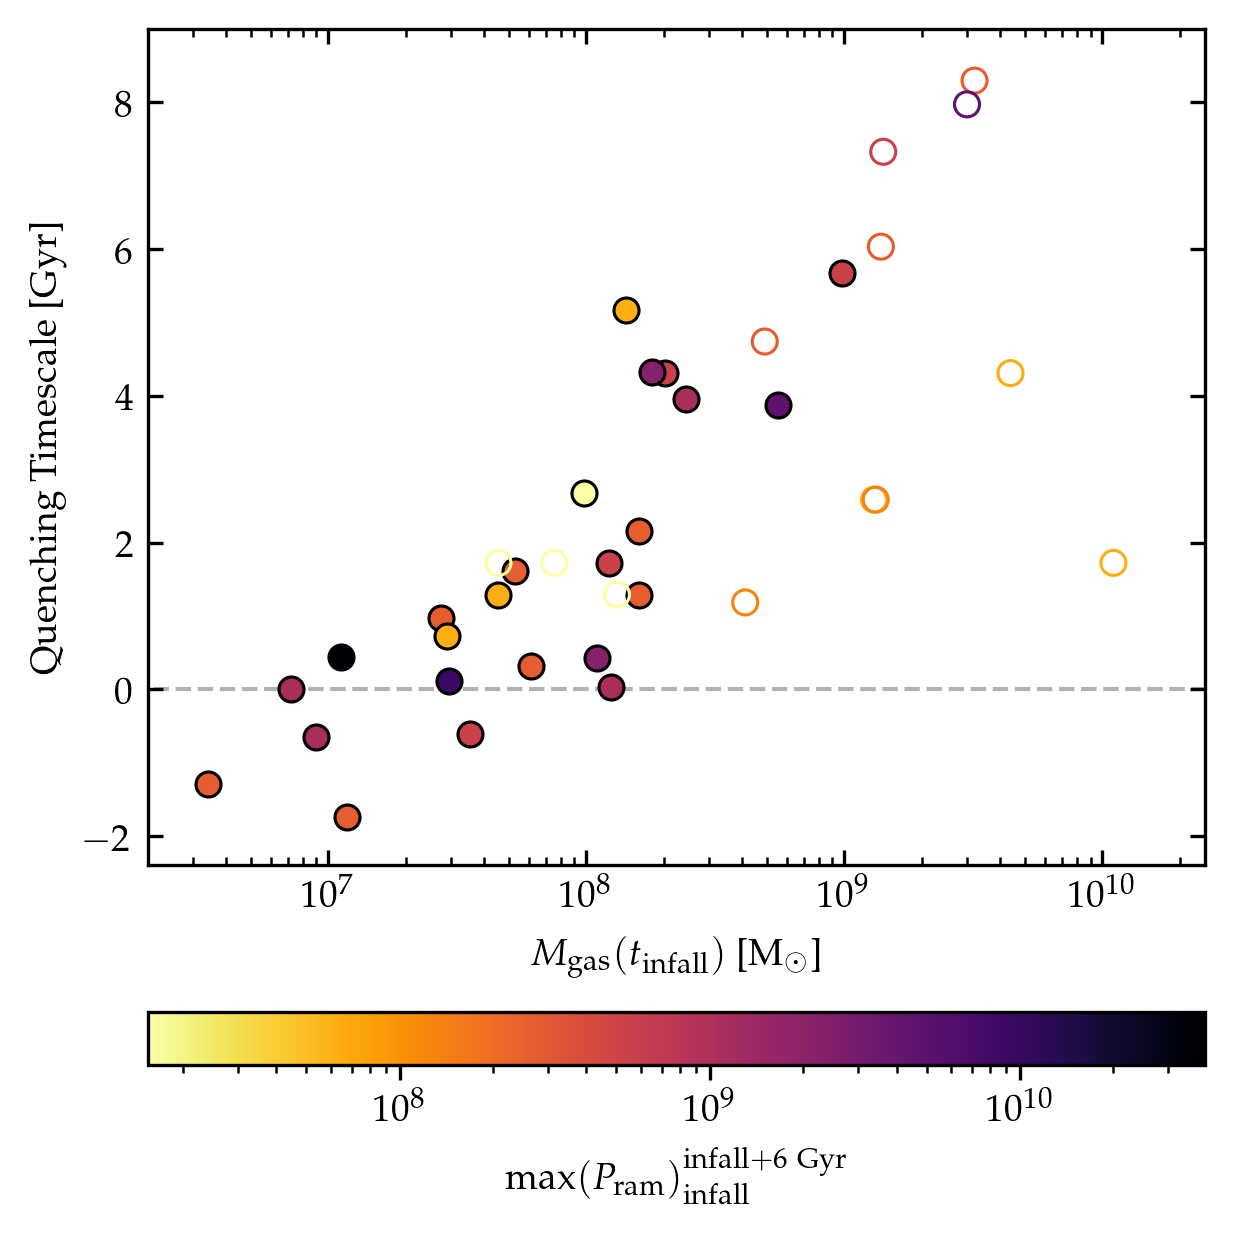

In [73]:
fig, ax = plt.subplots(1,1, figsize=(4,4),dpi=300, constrained_layout=True)
pad = 0.01
aspect = 20

cmap_name = 'inferno_r'
cmap = mpl.cm.get_cmap(cmap_name, 12)
max_Pram, min_Pram = max(Pram_max), min(Pram_max)
# max_Pram, min_Pram = np.max(Pram), 2e6

for s,h,q, mg, t, pr in zip(sims, haloids, quenched, M_gas_at_infall, timescale, Pram_max):
    color = cmap((np.log10(pr) - np.log10(min_Pram))/(np.log10(max_Pram) - np.log10(min_Pram)))
    if q:
        im0 = ax.scatter([mg], [t], fc = color,  ec='k', lw=0.75, zorder=2)
    else:
        im0 = ax.scatter([mg], [t], fc = 'none',  ec=color, lw=0.75, zorder=2)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.LogNorm(vmin=min_Pram, vmax=max_Pram), cmap=cmap_name), ax=ax,
             label=r'${\rm max}(P_{\mathrm{ram}})_{\rm infall}^{{\rm infall}+6~{\rm Gyr}}$', orientation='horizontal', pad=pad, aspect=aspect)



ax.semilogx()
ax.tick_params(direction='in', which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.set_ylim(-2.4, 9)
ax.plot([1e4,1e11],[0,0], 'k--', linewidth=1, alpha=0.3,zorder=-1)

ax.set_ylabel('Quenching Timescale [Gyr]')
ax.set_xlabel('$M_{\mathrm{gas}}(t_{\mathrm{infall}})$ [$\mathrm{M}_\odot$]')
ax.set_xlim(2e6, 2.5e10)


plt.savefig('timescale_Pram_max.pdf',dpi=300)
plt.show()

In [77]:

len(Pram)

22